## Approximating Contours(폐곡선 근사) and Convex Hull 

***cv2.approxPolyDP(contour, Approximation Accuracy, Closed)***
- **contour** – is the individual contour we wish to approximate
- **Approximation Accuracy** – Important parameter is determining the accuracy of the approximation. Small values give precise-  approximations, large values give more generic approximation. A good rule of thumb is less than 5% of the contour perimeter
- **Closed** – a Boolean value that states whether the approximate contour should be open or closed 


In [1]:
#github repository sync in google colab
import os
try:
  # Colab only
  !git clone https://github.com/hukim1112/DLCV_CLASS.git
  os.chdir('/content/DLCV_CLASS/lecture4')      
except Exception:
  pass

Cloning into 'DLCV_CLASS'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 250 (delta 48), reused 113 (delta 38), pack-reused 127
Receiving objects: 100% (250/250), 34.05 MiB | 46.00 MiB/s, done.
Resolving deltas: 100% (76/76), done.


In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

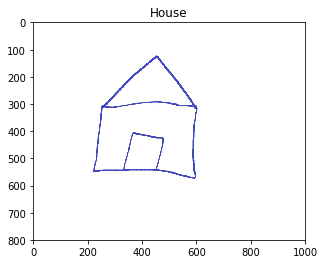

In [39]:
# Load image and keep a copy
image = cv2.imread('data/house.jpg')[:,:,::-1]
orig_image = image.copy()

plt.imshow(orig_image)
plt.title('House')

plt.show()

In [0]:
# Grayscale and binarize
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours 
_, contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

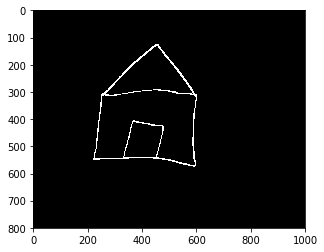

In [41]:
plt.imshow(thresh, cmap='gray')

In [42]:
print(len(contours))

4


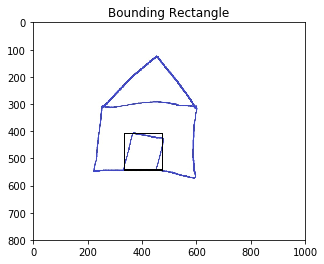

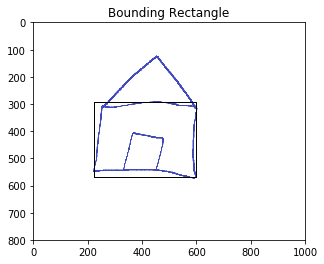

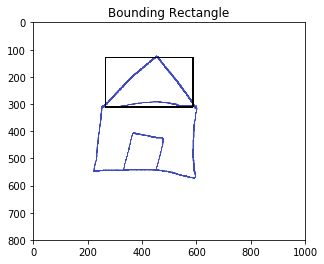

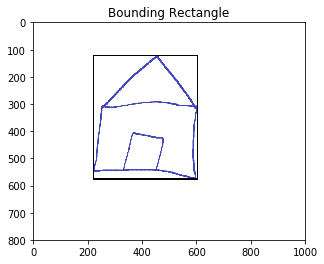

In [43]:
# Iterate through each contour and compute the bounding rectangle
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    plt.imshow(cv2.rectangle(orig_image.copy(),(x,y),(x+w,y+h),(0,0,0),3)    )
       
    plt.title('Bounding Rectangle'); plt.show()

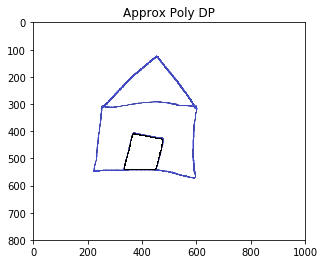

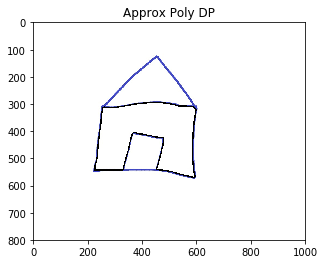

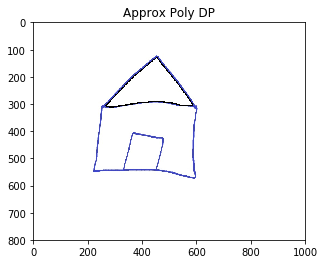

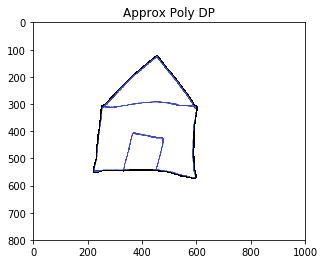

In [47]:
# Iterate through each contour and compute the contour
for c in contours:
    plt.imshow(cv2.drawContours(image.copy(), [c], 0, (0, 0, 0), 4))
    plt.title('Approx Poly DP'); plt.show()

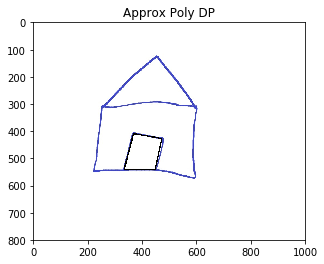

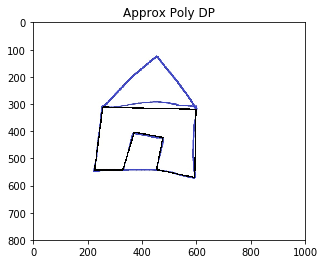

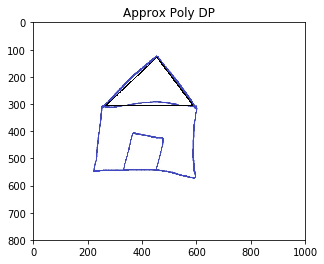

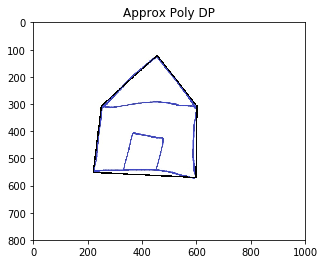

In [45]:
# Iterate through each contour and compute the approx contour
for c in contours:
    # Calculate accuracy as a percent of the contour perimeter
    accuracy = 0.03 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, accuracy, True)
    plt.imshow(cv2.drawContours(image.copy(), [approx], 0, (0, 0, 0), 4))
    plt.title('Approx Poly DP'); plt.show()

## Convex Hull



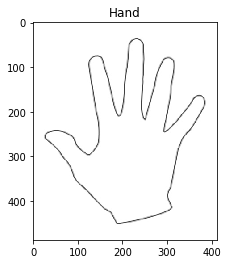

In [32]:
# Load image and keep a copy
image = cv2.imread('data/hand.jpg'); orig_image = image.copy()

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Hand')

plt.show()

In [0]:

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image
ret, thresh = cv2.threshold(gray, 176, 255, 0)

# Find contours 
_, contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    
# Sort Contors by area and then remove the largest frame contour
n = len(contours) - 1
contours = sorted(contours, key=cv2.contourArea, reverse=False)[:n]

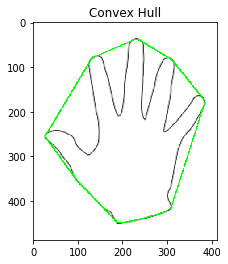

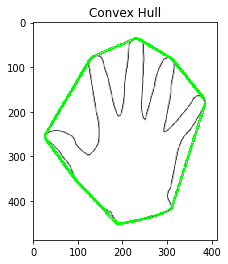

In [24]:
# Iterate through contours and draw the convex hull
for c in contours:
    hull = cv2.convexHull(c)
    cv2.drawContours(image, [hull], 0, (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Convex Hull'); plt.show()
    cv2.imwrite('convexHull.jpg', image)